In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/Dataset/training_50_of_each_websitetype.xlsx"
read_file = pd.read_excel(path)
read_file.to_csv('training_50_of_each_websitetype.csv', encoding='utf-8', index=False)
read_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      358 non-null    float64
 1   URL Name        399 non-null    object 
 2   URL Sub Domain  240 non-null    object 
 3   URL Domain      399 non-null    object 
 4   Repetition      399 non-null    int64  
 5   Web Type        399 non-null    object 
 6   Web Content     181 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 21.9+ KB


In [4]:
read_file.head()

,Unnamed: 0,URL Name,URL Sub Domain,URL Domain,Repetition,Web Type,Web Content
0,5.0,https://stackoverflow.com/help/privileges/edit,NaN,stackoverflow.com,180,Blog Post,Opinion/Specialty
1,8.0,https://stackoverflow.com/help/privileges/comment,NaN,stackoverflow.com,93,Blog Post,Opinion/Specialty
2,23.0,https://stackoverflow.com/help/referencing,NaN,stackoverflow.com,83,Blog Post,Opinion/Specialty
3,24.0,https://stackoverflow.com/help/how-to-answer,NaN,stackoverflow.com,119,Blog Post,Opinion/Specialty
4,30.0,https://stackoverflow.com/editing-help,NaN,stackoverflow.com,41,Blog Post,Example


In [5]:
read_file.groupby('Web Type').describe()

Unnamed: 0                ... Repetition       
                             count          mean  ...        75%    max
Web Type                                          ...                  
Blog Post                     50.0    389.980000  ...      36.25  557.0
Images                        50.0    823.760000  ...       1.00    2.0
Official Documentation        10.0    640.500000  ...       1.00    3.0
Other                         49.0  41865.183673  ...       2.00    6.0
Product/Project Website       50.0   1130.140000  ...       1.75   63.0
Q&A Post                      49.0     61.102041  ...       4.00  304.0
User Profile                  50.0   1044.540000  ...       2.00   25.0
Wiki                          50.0    756.000000  ...       2.00   12.0

[8 rows x 16 columns]

In [6]:
df = read_file.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      358 non-null    float64
 1   URL Name        399 non-null    object 
 2   URL Sub Domain  240 non-null    object 
 3   URL Domain      399 non-null    object 
 4   Repetition      399 non-null    int64  
 5   Web Type        399 non-null    object 
 6   Web Content     181 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 21.9+ KB


In [8]:
import string
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [9]:
wordNetLemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^0-9a-zA-Z]', ' ', df['URL Name'][i])
    review = review.lower()
    review = review.split()    
    review = [wordNetLemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    #review = [word for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [10]:
corpus[:5]

['http stackoverflow com help privilege edit',
 'http stackoverflow com help privilege comment',
 'http stackoverflow com help referencing',
 'http stackoverflow com help answer',
 'http stackoverflow com editing help']

In [11]:
df.head()

,Unnamed: 0,URL Name,URL Sub Domain,URL Domain,Repetition,Web Type,Web Content
0,5.0,https://stackoverflow.com/help/privileges/edit,NaN,stackoverflow.com,180,Blog Post,Opinion/Specialty
1,8.0,https://stackoverflow.com/help/privileges/comment,NaN,stackoverflow.com,93,Blog Post,Opinion/Specialty
2,23.0,https://stackoverflow.com/help/referencing,NaN,stackoverflow.com,83,Blog Post,Opinion/Specialty
3,24.0,https://stackoverflow.com/help/how-to-answer,NaN,stackoverflow.com,119,Blog Post,Opinion/Specialty
4,30.0,https://stackoverflow.com/editing-help,NaN,stackoverflow.com,41,Blog Post,Example


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_web_type = le.fit_transform(df['Web Type'])
df['encoded_web_type'] = encoded_web_type

In [13]:
df.head()

,Unnamed: 0,URL Name,URL Sub Domain,URL Domain,Repetition,Web Type,Web Content,encoded_web_type
0,5.0,https://stackoverflow.com/help/privileges/edit,NaN,stackoverflow.com,180,Blog Post,Opinion/Specialty,0
1,8.0,https://stackoverflow.com/help/privileges/comment,NaN,stackoverflow.com,93,Blog Post,Opinion/Specialty,0
2,23.0,https://stackoverflow.com/help/referencing,NaN,stackoverflow.com,83,Blog Post,Opinion/Specialty,0
3,24.0,https://stackoverflow.com/help/how-to-answer,NaN,stackoverflow.com,119,Blog Post,Opinion/Specialty,0
4,30.0,https://stackoverflow.com/editing-help,NaN,stackoverflow.com,41,Blog Post,Example,0


In [14]:
df.groupby('encoded_web_type').describe()

Unnamed: 0                              ... Repetition              
                      count          mean           std  ...        50%    75%    max
encoded_web_type                                         ...                         
0                      50.0    389.980000    409.524537  ...        2.5  36.25  557.0
1                      50.0    823.760000   1304.516762  ...        1.0   1.00    2.0
2                      10.0    640.500000    804.381647  ...        1.0   1.00    3.0
3                      49.0  41865.183673  35068.768739  ...        2.0   2.00    6.0
4                      50.0   1130.140000   1180.239754  ...        1.0   1.75   63.0
5                      49.0     61.102041     53.996622  ...        1.0   4.00  304.0
6                      50.0   1044.540000    774.563240  ...        1.0   2.00   25.0
7                      50.0    756.000000    597.380301  ...        1.0   2.00   12.0

[8 rows x 16 columns]

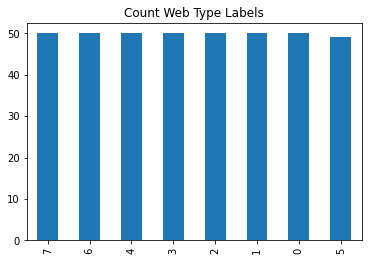

In [15]:
df['encoded_web_type'].value_counts().plot(kind='bar', title='Count Web Type Labels')

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
countvector=CountVectorizer()
df_bow=countvector.fit_transform(corpus).toarray()

In [18]:
print('Shape of Sparse Matrix: ', df_bow.shape)

Shape of Sparse Matrix:  (399, 1065)


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df_bow
y = df['encoded_web_type']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [21]:
from xgboost import XGBClassifier
xgb = XGBClassifier(silent=False, 
                      scale_pos_weight=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.6,
                      subsample = 1,
                      n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=6, 
                      gamma=1)
xgb.fit(X_train, y_train)

XGBClassifier(colsample_bytree=0.6, gamma=1, learning_rate=0.01, max_depth=6,
              n_estimators=1000, objective='multi:softprob', reg_alpha=0.3,
              silent=False)

In [22]:
xgb_pred = xgb.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(y_test, xgb_pred))
print(confusion_matrix(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        13
           1       1.00      1.00      1.00        13
           2       1.00      0.91      0.95        11
           3       0.85      0.79      0.81        14
           4       0.78      0.78      0.78         9
           5       0.50      1.00      0.67         6
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         5

    accuracy                           0.88        80
   macro avg       0.89      0.90      0.88        80
weighted avg       0.91      0.88      0.88        80

[[ 9  0  0  0  0  4  0  0]
 [ 0 13  0  0  0  0  0  0]
 [ 0  0 10  0  0  1  0  0]
 [ 0  0  0 11  2  1  0  0]
 [ 0  0  0  2  7  0  0  0]
 [ 0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  0  5]]


In [24]:
xgb.feature_importances_

array([0.01253922, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ], dtype=float32)

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [26]:
#plt.barh(df.columns, xgb.feature_importances_)

In [27]:
pd.Series(xgb.feature_importances_)

0       0.012539
1       0.000000
2       0.000000
3       0.005654
4       0.000000
          ...   
1060    0.000000
1061    0.000000
1062    0.000000
1063    0.000000
1064    0.000000
Length: 1065, dtype: float32

In [28]:
countvector.vocabulary_

{'http': 526,
 'stackoverflow': 906,
 'com': 323,
 'help': 513,
 'privilege': 762,
 'edit': 416,
 'comment': 325,
 'referencing': 810,
 'answer': 205,
 'editing': 417,
 'blog': 267,
 '2018': 70,
 '11': 21,
 '21': 76,
 'theory': 952,
 'moderation': 654,
 'visited': 1016,
 'libsyn': 597,
 '2016': 69,
 '01': 0,
 '12': 25,
 'get': 475,
 'podcast': 752,
 'spotify': 896,
 'archive': 218,
 'ktkqg': 578,
 'roomba': 832,
 '2009': 62,
 '04': 3,
 'day': 376,
 'penalty': 736,
 'box': 274,
 'codinghorror': 319,
 'happens': 507,
 'let': 595,
 'developer': 389,
 'create': 354,
 'ui': 985,
 '2013': 66,
 '06': 5,
 '25': 86,
 'war': 1024,
 'close': 313,
 '09': 8,
 'five': 457,
 'year': 1056,
 'ago': 192,
 'stack': 903,
 'overflow': 719,
 'launched': 589,
 'miracle': 648,
 'occurred': 701,
 'whats': 1034,
 'reputation': 821,
 '2015': 68,
 '07': 6,
 'survey': 927,
 'result': 825,
 'codereview': 318,
 'stackexchange': 904,
 'topic': 965,
 'election': 423,
 'tab': 934,
 'nomination': 692,
 'true': 972,
 'po

In [29]:
df2 = pd.DataFrame({"Feature Importance":pd.Series(xgb.feature_importances_)})


In [30]:
df2.tail()

,Feature Importance
1060,0.0
1061,0.0
1062,0.0
1063,0.0
1064,0.0


In [31]:
len(countvector.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


1065

In [32]:
df2['Vocab'] = countvector.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
df2.sort_values('Feature Importance').tail(20)

,Feature Importance,Vocab
886,0.014504,sort
934,0.014623,tab
906,0.015567,stackoverflow
827,0.015957,review
903,0.017114,stack
936,0.018366,tagged
747,0.018678,plot
525,0.018796,html
513,0.022002,help
267,0.023332,blog


In [34]:
df2.tail(20)

,Feature Importance,Vocab
1045,0.000000,workingwithsslatdevelopmenttimeiseasierwithiis...
1046,0.000000,workplace
1047,0.000000,worst
1048,0.000000,wrnj4
1049,0.000000,wunderground
1050,0.000000,wwdc
1051,0.027121,www
1052,0.000000,xa
1053,0.000000,xsvsz
1054,0.000000,yarnpkg


PEDICTIONS

In [35]:
path = '/content/drive/MyDrive/Colab Notebooks/Dataset/testset_2_UnknownLabels.csv'
df3 = pd.read_csv(path)

In [36]:
df3.tail()

,Unnamed: 0,URL Name
4117,4314,http://web.archive.org/web/20120504045242/http...
4118,4315,https://meta.stackoverflow.com/questions/25200...
4119,4316,https://i.stack.imgur.com/n8M8p.jpg
4120,4318,https://stackoverflow.com/questions/tagged/fac...
4121,4320,https://stackoverflow.com/questions/47818669/d...


In [37]:
#wordNetLemmatizer = WordNetLemmatizer()
corpus2 = []
for i in range(0, len(df3)):
    review = re.sub('[^0-9a-zA-Z]', ' ', df3['URL Name'][i])
    review = review.lower()
    review = review.split()    
    review = [wordNetLemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    #review = [word for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus2.append(review)

In [38]:
corpus2[:5]

['http data stackexchange com stackoverflow query 784562 question without answer filtered',
 'http stackoverflow com question tagged microsoft extension logging',
 'http appscript sourceforge net',
 'http meta stackoverflow com question 252656 punish answerer bad question',
 'http meta stackoverflow com question 333800 suggested edit rejection reason editing post']

In [39]:
df3_bow=countvector.transform(corpus2).toarray()

In [40]:
print('Shape of Sparse Matrix: ', df3_bow.shape)

Shape of Sparse Matrix:  (4122, 1065)


In [41]:
xgb_pred2 = xgb.predict(df3_bow)

In [42]:
type(xgb_pred2)

numpy.ndarray

In [43]:
df3['Predicted web types'] = xgb_pred2

In [44]:
df3.head()

,Unnamed: 0,URL Name,Predicted web types
0,0,https://data.stackexchange.com/stackoverflow/q...,5
1,1,https://stackoverflow.com/questions/tagged/mic...,5
2,3,http://appscript.sourceforge.net/,3
3,4,https://meta.stackoverflow.com/questions/25265...,5
4,5,https://meta.stackoverflow.com/questions/33380...,5


In [45]:
decoded_web_type = le.inverse_transform(df3['Predicted web types'])
df3['decoded_web_type'] = decoded_web_type

In [46]:
df3.head()

,Unnamed: 0,URL Name,Predicted web types,decoded_web_type
0,0,https://data.stackexchange.com/stackoverflow/q...,5,Q&A Post
1,1,https://stackoverflow.com/questions/tagged/mic...,5,Q&A Post
2,3,http://appscript.sourceforge.net/,3,Other
3,4,https://meta.stackoverflow.com/questions/25265...,5,Q&A Post
4,5,https://meta.stackoverflow.com/questions/33380...,5,Q&A Post


In [47]:
df3.to_csv('/content/drive/MyDrive/PredictedWebTypes.csv')

PREDICTIONS 2

In [48]:
path = '/content/drive/MyDrive/Colab Notebooks/Dataset/testset_1_KnownLabels.csv'
df4 = pd.read_csv(path)

In [49]:
df4.tail()

,Unnamed: 0,Unnamed: 0.1,URL Name,URL Sub Domain,URL Domain,Repetition,Web Type,Web Content
284,623,NaN,https://doc.rust-lang.org/stable/book/ownershi...,doc,rust-lang.org,1,Official Documentation,NaN
285,624,NaN,https://ruby-doc.org/stdlib/libdoc/fiddle/rdoc...,NaN,ruby-doc.org,1,Official Documentation,NaN
286,625,NaN,https://ruby-doc.org/stdlib/libdoc/irb/rdoc/IR...,NaN,ruby-doc.org,1,Official Documentation,NaN
287,626,NaN,https://reactjs.org/docs/state-and-lifecycle.html,NaN,reactjs.org,1,Official Documentation,NaN
288,649,63953.0,https://www.sanwebe.com/2013/04/capture-array-...,www,sanwebe.com,3,Other,NaN


In [50]:
corpus3 = []
for i in range(0, len(df4)):
    review = re.sub('[^0-9a-zA-Z]', ' ', df4['URL Name'][i])
    review = review.lower()
    review = review.split()    
    review = [wordNetLemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    #review = [word for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus3.append(review)

In [51]:
corpus3[:5]

['http stackoverflow com user story 1703216 view cv',
 'http stack imgur com nause png',
 'http stack imgur com qtpll jpg',
 'http stack imgur com pjzjq png',
 'http stack imgur com 4522t png']

In [52]:
df4_bow=countvector.transform(corpus3).toarray()

In [53]:
print('Shape of Sparse Matrix: ', df4_bow.shape)

Shape of Sparse Matrix:  (289, 1065)


In [54]:
xgb_pred3 = xgb.predict(df4_bow)

In [55]:
df4['Model Predicted Web types'] = xgb_pred3

In [56]:
model_decoded_web_type = le.inverse_transform(df4['Model Predicted Web types'])
df4['decoded_web_type'] = model_decoded_web_type

In [57]:
df4.head()

,Unnamed: 0,Unnamed: 0.1,URL Name,URL Sub Domain,URL Domain,Repetition,Web Type,Web Content,Model Predicted Web types,decoded_web_type
0,7,7.0,https://stackoverflow.com/users/story/1703216?...,NaN,stackoverflow.com,4,User Profile,Other,6,User Profile
1,17,17.0,https://i.stack.imgur.com/NaUse.png,i.stack,imgur.com,1,Images,Reference,1,Images
2,19,19.0,https://i.stack.imgur.com/QTplL.jpg,i.stack,imgur.com,2,Images,Reference,1,Images
3,20,20.0,https://i.stack.imgur.com/PjZjq.png,i.stack,imgur.com,1,Images,Reference,1,Images
4,27,27.0,https://i.stack.imgur.com/4522t.png,i.stack,imgur.com,1,Images,Reference,1,Images


In [58]:
df4.to_csv('/content/drive/MyDrive/PredictedWebTypesForComparison.csv')

PREDICTIONS 3 - Top 100 URLs

In [59]:
path = '/content/drive/MyDrive/Colab Notebooks/Dataset/testset_3_top100_url.csv'
df5 = pd.read_csv(path)

In [60]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      100 non-null    int64 
 1   Unnamed: 0.1    100 non-null    int64 
 2   URL Name        100 non-null    object
 3   URL Sub Domain  16 non-null     object
 4   URL Domain      100 non-null    object
 5   Repetition      100 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 4.8+ KB


In [61]:
corpus4 = []
for i in range(0, len(df5)):
    review = re.sub('[^0-9a-zA-Z]', ' ', df5['URL Name'][i])
    review = review.lower()
    review = review.split()    
    review = [wordNetLemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    #review = [word for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus4.append(review)

In [62]:
df5_bow=countvector.transform(corpus4).toarray()

In [63]:
xgb_pred4 = xgb.predict(df5_bow)

In [64]:
df5['Encoded Web types'] = xgb_pred4

In [65]:
model_decoded_web_type_2 = le.inverse_transform(df5['Encoded Web types'])
df5['Decoded Web Type'] = model_decoded_web_type_2

In [66]:
df5.head()

,Unnamed: 0,Unnamed: 0.1,URL Name,URL Sub Domain,URL Domain,Repetition,Encoded Web types,Decoded Web Type
0,924,924,https://stackoverflow.com/help/on-topic,NaN,stackoverflow.com,574,0,Blog Post
1,122,122,https://stackoverflow.com/help/mcve,NaN,stackoverflow.com,557,0,Blog Post
2,1358,1358,https://stackoverflow.com/help/how-to-ask,NaN,stackoverflow.com,461,0,Blog Post
3,1287,1287,https://stackoverflow.com/questions/tagged/java,NaN,stackoverflow.com,461,5,Q&A Post
4,1291,1291,https://stackoverflow.com/questions/tagged/jav...,NaN,stackoverflow.com,435,5,Q&A Post


In [67]:
df5.to_csv('/content/drive/MyDrive/PredictedWebTypesForTop100Urls.csv')

10 fold cross validation

In [68]:
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(xgb, X, y, scoring='accuracy', cv=10)

In [69]:
scores

array([0.8       , 0.75      , 0.925     , 0.825     , 0.9       ,
       0.825     , 0.925     , 0.95      , 0.8       , 0.92307692])

In [70]:
scores.mean()

0.8623076923076922